## Name:Swarna Anjani Devershetty
## Course:MSCS 634  
## Lab Title: Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python


In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv("student_habits_performance.csv")  # Replace with the actual path
df.head()  # Screenshot Required


student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

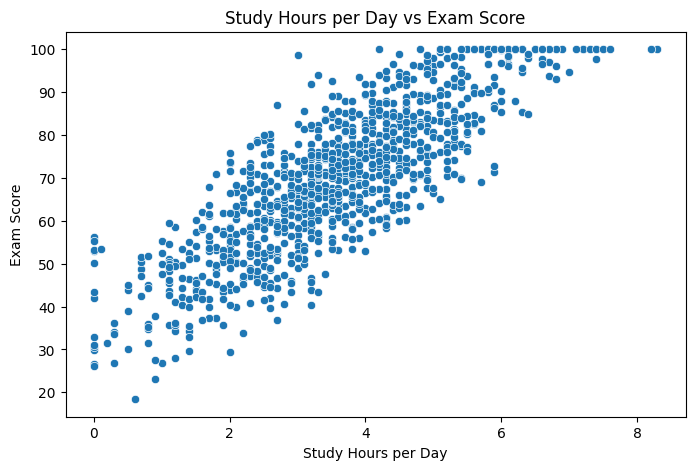

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Study Hours vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Study Hours per Day vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()


In [3]:
# Box Plot: Exam Score by Diet Quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='diet_quality', y='exam_score', data=df)
plt.title('Exam Score Distribution by Diet Quality')
plt.xlabel('Diet Quality')
plt.ylabel('Exam Score')
plt.show()


In [4]:
df['parental_education_level'].isnull().sum()  # Report missing

# Fill missing values with mode
df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)
df.isnull().sum()  # After filling


C:\Users\Anusha\AppData\Local\Temp\ipykernel_107512\3469059925.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)


student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [5]:
# Use IQR method on 'exam_score'
Q1 = df['exam_score'].quantile(0.25)
Q3 = df['exam_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['exam_score'] < lower_bound) | (df['exam_score'] > upper_bound)]
df_no_outliers = df[(df['exam_score'] >= lower_bound) & (df['exam_score'] <= upper_bound)]
outliers
df_no_outliers

student_id  age  gender  study_hours_per_day  social_media_hours  \
0        S1000   23  Female                  0.0                 1.2   
1        S1001   20  Female                  6.9                 2.8   
2        S1002   21    Male                  1.4                 3.1   
3        S1003   23  Female                  1.0                 3.9   
4        S1004   19  Female                  5.0                 4.4   
..         ...  ...     ...                  ...                 ...   
995      S1995   21  Female                  2.6                 0.5   
996      S1996   17  Female                  2.9                 1.0   
997      S1997   20    Male                  3.0                 2.6   
998      S1998   24    Male                  5.4                 4.1   
999      S1999   19  Female                  4.3                 2.9   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0              1.1            No                   85.0          8.0   
1              2.3            No                   97.3          4.6   
2              1.3            No                   94.8          8.0   
3              1.0            No                   71.0          9.2   
4              0.5            No                   90.9          4.9   
..             ...           ...                    ...          ...   
995            1.6            No                   77.0          7.5   
996            2.4           Yes                   86.0          6.8   
997            1.3            No                   61.9          6.5   
998            1.1           Yes                  100.0          7.6   
999            1.9            No                   89.4          7.1   

    diet_quality  exercise_frequency parental_education_level  \
0           Fair                   6                   Master   
1           Good                   6              High School   
2           Poor                   1              High School   
3           Poor                   4                   Master   
4           Fair                   3                   Master   
..           ...                 ...                      ...   
995         Fair                   2              High School   
996         Poor                   1              High School   
997         Good                   5                 Bachelor   
998         Fair                   0                 Bachelor   
999         Good                   2                 Bachelor   

    internet_quality  mental_health_rating extracurricular_participation  \
0            Average                     8                           Yes   
1            Average                     8                            No   
2               Poor                     1                            No   
3               Good                     1                           Yes   
4               Good                     1                            No   
..               ...                   ...                           ...   
995             Good                     6                           Yes   
996          Average                     6                           Yes   
997             Good                     9                           Yes   
998          Average                     1                            No   
999          Average                     8                            No   

     exam_score  
0          56.2  
1         100.0  
2          34.3  
3          26.8  
4          66.4  
..          ...  
995        76.1  
996        65.9  
997        64.4  
998        69.7  
999        74.9  

[998 rows x 16 columns]

In [6]:
# Drop less relevant columns (e.g., student_id)
df_reduced = df.drop(columns=['student_id'])
df_reduced
# Sample 50% of the data
df_sampled = df_reduced.sample(frac=0.5, random_state=42)
df_sampled

age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
521   23    Male                  3.5                 2.1            1.4   
737   21    Male                  5.9                 4.6            2.6   
740   23  Female                  4.5                 2.4            1.2   
660   24  Female                  3.3                 2.2            1.4   
411   24    Male                  1.6                 0.8            3.2   
..   ...     ...                  ...                 ...            ...   
178   17   Other                  2.9                 2.5            2.4   
444   20    Male                  2.8                 1.8            2.7   
416   21    Male                  1.1                 4.3            0.9   
870   21   Other                  4.7                 0.0            2.7   
882   19   Other                  2.7                 1.8            0.0   

    part_time_job  attendance_percentage  sleep_hours diet_quality  \
521            No                   82.2          7.7         Fair   
737           Yes                  100.0          6.6         Fair   
740           Yes                   86.8          6.5         Poor   
660            No                   89.1          5.9         Good   
411           Yes                   63.0          8.0         Good   
..            ...                    ...          ...          ...   
178           Yes                   83.7          6.3         Poor   
444            No                   79.1          9.0         Poor   
416            No                   86.7          4.9         Fair   
870           Yes                   62.0          5.4         Good   
882            No                   72.5          6.5         Fair   

     exercise_frequency parental_education_level internet_quality  \
521                   1              High School             Good   
737                   0              High School          Average   
740                   3              High School          Average   
660                   2              High School             Good   
411                   3              High School             Good   
..                  ...                      ...              ...   
178                   5              High School             Good   
444                   4                   Master          Average   
416                   3              High School          Average   
870                   1              High School             Good   
882                   4                 Bachelor             Poor   

     mental_health_rating extracurricular_participation  exam_score  
521                     3                            No        64.2  
737                     1                           Yes        72.7  
740                     4                           Yes        79.0  
660                     9                           Yes        79.5  
411                    10                            No        58.2  
..                    ...                           ...         ...  
178                     9                            No        65.2  
444                     1                           Yes        64.9  
416                     9                            No        49.9  
870                     3                            No        67.5  
882                     7                            No        68.2  

[500 rows x 15 columns]

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['study_hours_per_day', 'exam_score']] = scaler.fit_transform(df_scaled[['study_hours_per_day', 'exam_score']])

# Discretize exam score into grade buckets
df_scaled['grade'] = pd.cut(df_scaled['exam_score'], bins=[0, 0.5, 0.75, 1.0], labels=['Low', 'Medium', 'High'])
df_scaled

student_id  age  gender  study_hours_per_day  social_media_hours  \
0        S1000   23  Female             0.000000                 1.2   
1        S1001   20  Female             0.831325                 2.8   
2        S1002   21    Male             0.168675                 3.1   
3        S1003   23  Female             0.120482                 3.9   
4        S1004   19  Female             0.602410                 4.4   
..         ...  ...     ...                  ...                 ...   
995      S1995   21  Female             0.313253                 0.5   
996      S1996   17  Female             0.349398                 1.0   
997      S1997   20    Male             0.361446                 2.6   
998      S1998   24    Male             0.650602                 4.1   
999      S1999   19  Female             0.518072                 2.9   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0              1.1            No                   85.0          8.0   
1              2.3            No                   97.3          4.6   
2              1.3            No                   94.8          8.0   
3              1.0            No                   71.0          9.2   
4              0.5            No                   90.9          4.9   
..             ...           ...                    ...          ...   
995            1.6            No                   77.0          7.5   
996            2.4           Yes                   86.0          6.8   
997            1.3            No                   61.9          6.5   
998            1.1           Yes                  100.0          7.6   
999            1.9            No                   89.4          7.1   

    diet_quality  exercise_frequency parental_education_level  \
0           Fair                   6                   Master   
1           Good                   6              High School   
2           Poor                   1              High School   
3           Poor                   4                   Master   
4           Fair                   3                   Master   
..           ...                 ...                      ...   
995         Fair                   2              High School   
996         Poor                   1              High School   
997         Good                   5                 Bachelor   
998         Fair                   0                 Bachelor   
999         Good                   2                 Bachelor   

    internet_quality  mental_health_rating extracurricular_participation  \
0            Average                     8                           Yes   
1            Average                     8                            No   
2               Poor                     1                            No   
3               Good                     1                           Yes   
4               Good                     1                            No   
..               ...                   ...                           ...   
995             Good                     6                           Yes   
996          Average                     6                           Yes   
997             Good                     9                           Yes   
998          Average                     1                            No   
999          Average                     8                            No   

     exam_score   grade  
0      0.463235     Low  
1      1.000000    High  
2      0.194853     Low  
3      0.102941     Low  
4      0.588235  Medium  
..          ...     ...  
995    0.707108  Medium  
996    0.582108  Medium  
997    0.563725  Medium  
998    0.628676  Medium  
999    0.692402  Medium  

[1000 rows x 17 columns]

In [8]:
df.info()  # Screenshot
df.describe()  # Screenshot


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

In [9]:
print("Minimum:", df['exam_score'].min())
print("Maximum:", df['exam_score'].max())
print("Mean:", df['exam_score'].mean())
print("Median:", df['exam_score'].median())
print("Mode:", df['exam_score'].mode()[0])


Minimum: 18.4
Maximum: 100.0
Mean: 69.6015
Median: 70.5
Mode: 100.0


In [10]:
print("Range:", df['exam_score'].max() - df['exam_score'].min())
print("Quartiles:", df['exam_score'].quantile([0.25, 0.5, 0.75]))
print("IQR:", IQR)
print("Variance:", df['exam_score'].var())
print("Standard Deviation:", df['exam_score'].std())


Range: 81.6
Quartiles: 0.25    58.475
0.50    70.500
0.75    81.325
Name: exam_score, dtype: float64
IQR: 22.85
Variance: 285.2235913413413
Standard Deviation: 16.888563921818257


In [11]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
